In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import shap
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [3]:
pwd

'C:\\Users\\nazmul_hossen'

In [2]:
cd Ensemble-learning

C:\Users\nazmul_hossen\Ensemble-learning


In [4]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is CCCD-CCBC

 Directory of C:\Users\nazmul_hossen\Ensemble-learning

11/12/2023  07:17 PM    <DIR>          .
11/13/2023  12:14 AM    <DIR>          ..
11/12/2023  07:15 PM            53,393 german_credit_data.csv
               1 File(s)         53,393 bytes
               2 Dir(s)  266,665,136,128 bytes free


In [3]:
data = pd.read_csv('german_credit_data.csv')

In [4]:
data['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [5]:
data = data.drop('Unnamed: 0', axis=1)

In [6]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
data.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [8]:
data['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [16]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

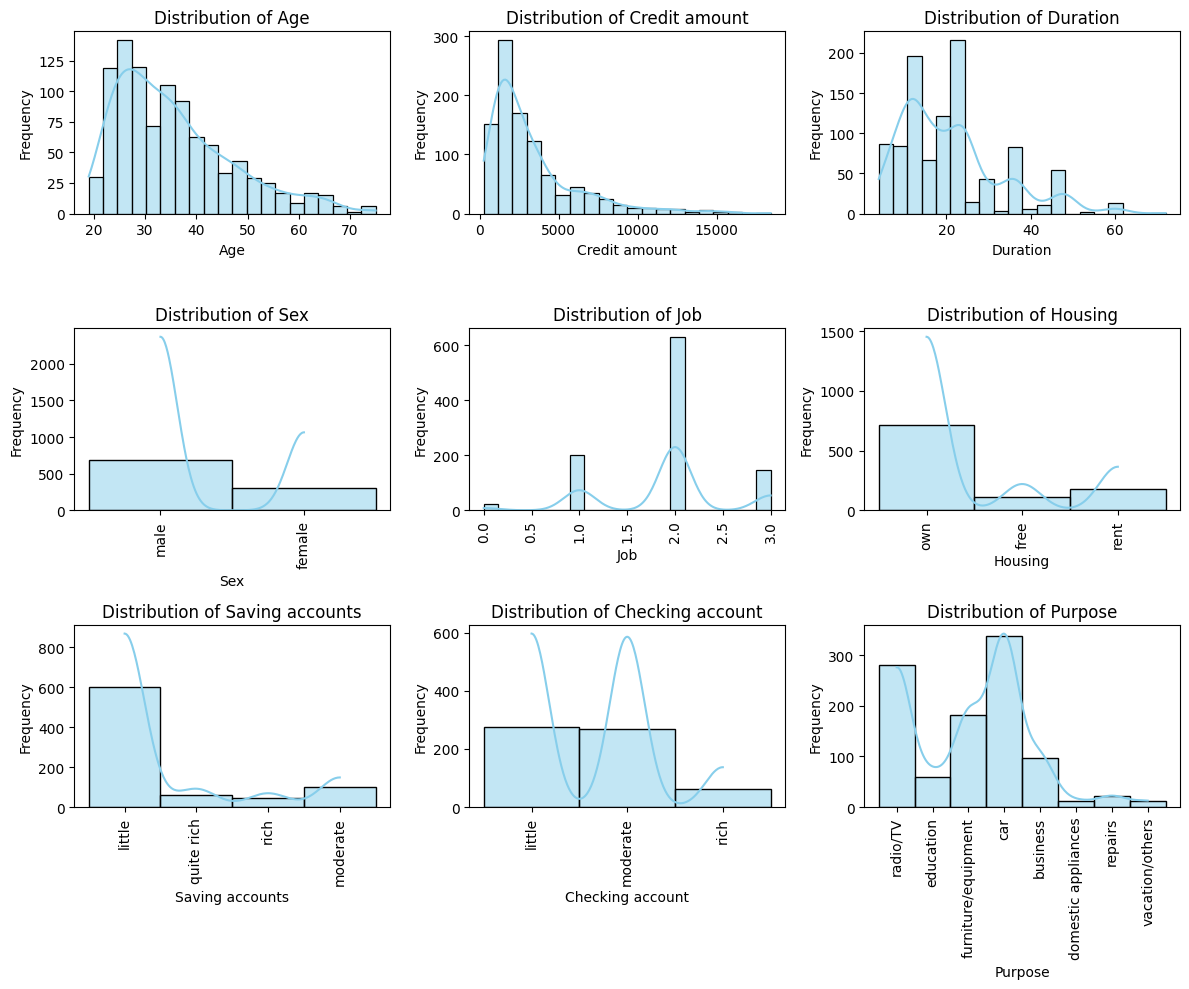

In [10]:
plt.figure(figsize=(12, 10))

# Histogram for Age
plt.subplot(3, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Credit amount
plt.subplot(3, 3, 2)
sns.histplot(data['Credit amount'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Credit amount')
plt.xlabel('Credit amount')
plt.ylabel('Frequency')

# Histogram for Duration
plt.subplot(3, 3, 3)
sns.histplot(data['Duration'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# Histogram for Sex
plt.subplot(3, 3, 4)
sns.histplot(data['Sex'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Histogram for Job
plt.subplot(3, 3, 5)
sns.histplot(data['Job'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Job')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Histogram for Housing
plt.subplot(3, 3, 6)
sns.histplot(data['Housing'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Housing')
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Histogram for Saving accounts
plt.subplot(3, 3, 7)
sns.histplot(data['Saving accounts'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Saving accounts')
plt.xlabel('Saving accounts')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Histogram for Checking account
plt.subplot(3, 3, 8)
sns.histplot(data['Checking account'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Checking account')
plt.xlabel('Checking account')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Histogram for Purpose
plt.subplot(3, 3, 9)
sns.histplot(data['Purpose'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

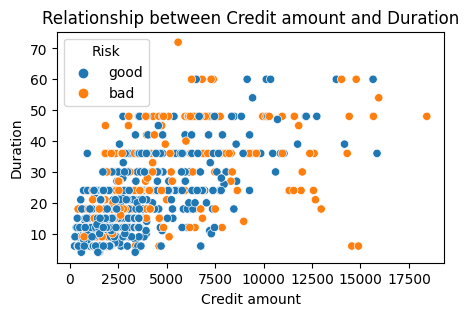

In [11]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Credit amount', y='Duration', hue='Risk', data=data)
plt.title('Relationship between Credit amount and Duration')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

In [13]:
data_imputed = data.copy()

# Impute 'Saving accounts' with the most frequent value
saving_accounts_imputer = SimpleImputer(strategy='most_frequent')
checking_accounts_imputer = SimpleImputer(strategy='most_frequent')
data_imputed['Saving accounts'] = saving_accounts_imputer.fit_transform(data_imputed[['Saving accounts']])
data_imputed['Checking account'] = saving_accounts_imputer.fit_transform(data_imputed[['Checking account']])
print(data_imputed.head())

   Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little           little           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad  


In [14]:
columns_to_label_encode = ['Sex', 'Housing', 'Purpose', 'Risk','Saving accounts', 'Checking account' ]

label_encoder = LabelEncoder()

for column in columns_to_label_encode:
    data_imputed[column] = label_encoder.fit_transform(data_imputed[column])

# Display the updated DataFrame
data_imputed[:100]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
95,58,1,2,2,0,1,15945,54,0,0
96,61,0,2,1,0,0,2012,12,3,1
97,34,1,2,1,1,1,2622,18,0,1
98,36,1,2,1,0,1,2337,36,5,1


In [56]:
data['Checking account'].dtype

dtype('float64')

In [15]:
x = data_imputed.iloc[:,:9]

In [16]:
y = data_imputed.iloc[:,-1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 22)

# Bagging

In [18]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = DecisionTreeClassifier(random_state=42)

ensemble = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('dt', model3)], voting='soft')

In [44]:
ensemble_pred = ensemble.predict(x_test)
acc_ensemble = accuracy_score(y_test, ensemble_pred)
acc_ensemble

0.74

# Boosting (AdaBoost)

In [37]:
# Create an AdaBoost classifier using the RandomForest as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=model1, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(x_train, y_train)  # Replace X_train and y_train with your training data

# Predictions
adaboost_pred = adaboost_model.predict(x_test)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


In [38]:
adaboost_acc = accuracy_score(y_test,adaboost_pred)
adaboost_acc

0.72

# Stacking

In [42]:
meta_classifier = LogisticRegression(random_state=42)

stacking_model = StackingClassifier(estimators=[('rf', model1), ('lr', model2), ('dt', model3)],
                                    final_estimator=meta_classifier)

stacking_model.fit(x_train, y_train)

stacking_pred = stacking_model.predict(x_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [43]:
stacking_acc = accuracy_score(y_test,stacking_pred)
stacking_acc

0.755

In [19]:
ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

0.645

# Dynamic ensemble learning (model inclusion/exclusion)

In [51]:
num_epochs = 100
threshold = 0.65

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

   
model1_pred = model1.predict(x_test)
model2_pred = model2.predict(x_test)
model3_pred = model3.predict(x_test)
    
accuracy_model1 = accuracy_score(y_test, model1_pred)
accuracy_model2 = accuracy_score(y_test, model2_pred)
accuracy_model3 = accuracy_score(y_test, model3_pred)

In [52]:
ensemble.estimators

[('rf', RandomForestClassifier(random_state=42)),
 ('lr', LogisticRegression(random_state=42))]

In [53]:
valid_estimators = []

for i, (name, model) in enumerate(ensemble.estimators):
    if (name == 'rf' and accuracy_model1 >= threshold) or \
       (name == 'lr' and accuracy_model2 >= threshold) or \
       (name == 'dt' and accuracy_model3 >= threshold):
        valid_estimators.append((name, model))

# Update the ensemble with valid estimators
ensemble.estimators = valid_estimators

if ensemble.estimators:
    ensemble.fit(x_train, y_train)
else:
    print("No valid estimators left in the ensemble. Adjust your threshold or consider handling this case differently.")

In [54]:
len(ensemble.estimators)

2

In [55]:
y_pred = ensemble.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy:.4f}")

Ensemble Accuracy: 0.7400
